# The ADALINE 

## Learning objectives

1. Understand the principles behind the creation of the ADALINE
2. Identify the similarities and differences between the perceptron and the ADALINE
3. Acquire an intuitive understanding of learning via gradient descent
4. Develop a basic code implementation of the ADALINE in Python
5. Determine what kind of problems can and can't be solved with the ADALINE 

## Historical and theoretical background

The ADALINE (*Adaptive Linear Neuron*) was introduced in 1959, shortly after Rosenblatt’s perceptron, by *Bernard Widrow* and *Ted Hoff* (one of the inventors of the microprocessor) at Stanford. Widrow and Hoff were electrical engineers, yet Widrow had attended the famous [Dartmouth workshop on artificial intelligence](https://en.wikipedia.org/wiki/Dartmouth_workshop) in 1956, an experience that got him interested in the idea of building brain-like artificial learning systems. When Widrow moved from MIT to Stanford, a colleague asked him whether he would be interested in taking Ted Hoff as his doctoral student. Widrow and Hoff came up with the ADALINE idea  on a Friday during their first session working together. At the time, implementing an algorithm in a mainframe computer was slow and expensive, so they decided to build a small electronic device capable of being trained by the ADALINE algorithm to learn to classify patterns of inputs.  

The main difference between the perceptron and the ADALINE is that the later works by minimizing the [*mean squared error*](https://en.wikipedia.org/wiki/Mean_squared_error) of the predictions of a linear function. This means that the learning procedure is based on the outcome of a *linear function* rather than on the outcome of a threshold function as in the perceptron. **Figure 2** summarizes such difference schematically. 

From a cognitive science perspective, the main contribution of the ADALINE was methodological rather than theoretical. Widrow and Hoff were not primarily concerned with understanding the organization and function of the human mind. Although the ADALINE was initially applied to problems like speech and pattern recognition (Talbert et al., 1963), the main application of the ADALINE was in adaptive filtering and adaptive signal processing. Technologies like adaptive antennas, adaptive noise canceling, and adaptive equalization in high-speed modems (which makes Wifi works well), were developed by using the ADALINE (Widrow & Lehr, 1990).

Mathematically, learning from the output of a linear function enables the minimization of a continuous [*cost or loss function*](https://en.wikipedia.org/wiki/Loss_function). In simple terms, a cost function is a measure of the overall *badness* (or *goodness*) of the network predictions. Continuous cost functions have the advantage of having "nice" derivatives, that facilitate training neural nets by using the [chain rule of calculus](https://en.wikipedia.org/wiki/Chain_rule). This change opened the door to train more complex algorithms like non-linear multilayer perceptrons, logistic regression, support vector machines, and others. 

Next, we will review the ADALINE formalization, learning procedure, and optimization process.

## Mathematical formalization

Mathematically, the ADALINE is described by:

- a *linear function* that aggregates the input signal
- a *learning procedure* to adjust connection weights

Depending on the problem to be approached, a *threshold function*, as in the McCulloch-Pitts and the perceptron, can be added. Yet, such function is not part of the learning procedure, therefore, is not stricly necessary to define an ADALINE.

### Linear aggregation function

The linear aggregation function is the same as in the perceptron:

<br style = “line-height:100px;”>
<img src="images/adaline/linear-function-adaline.svg" width="60%"/>

where:  
- $\hat{y}$ is the output of the model 
- $x$ is a real value input vector   
- $w$ is a real vaue weight vector
- $b$ is a bias term  

For a real-valued prediction problem, this is enough. 

### Threshold decision function

When dealing with a *binary classification problem*, we will still use a threshold function, as in the perceptron, by taking the sign of the linear function as: 

$$
\hat{y}' = f(\hat{y}) =
\begin{cases}
+1, & \text{if \hat{y} > 0} \\
-1, & \text{otherwise}
\end{cases}
$$

where $\hat{y}$ is the output of the linear aggregation function.

### The Perceptron and ADALINE fundamental difference

At this point, you may be wondering what's the difference between the perceptron and the ADALINE considering that both end up using a threshold function to make classifications. The difference is the **learning procedure to update the weight** of the network. The perceptron updates the weights by computing the difference between the expected and predicted *class values*. In other words, the perceptron always compares +1 or -1 (predicted values) to +1 or -1 (expected values). An important consequence of this is that perceptron *only learns when errors are made*. In contrast, the ADALINE computes the difference between the expected class value $y$ (+1 or -1), and the *continuous* output value $\hat{y}$ from the linear function, which can be *any real number*. This is crucial because it means the ADALINE can learn *even when no classification mistake has been made*. This is a consequence of the fact that predicted class values $\hat{y}'$ do not influence the error computation. Since the ADALINE learns *all the time* and the perceptron only after errors, the ADALINE will find a solution faster than the perceptron for the same problem. **Figure 1** illustrate this difference in the paths and formulas highlighted in red.

<center>Figure 1<center/>
<br style = “line-height:100px;”>
<img src="images/adaline/adaline-math.svg" width="80%"/>

### The ADALINE error surface

Before approaching the formal definition of the ADALINE learning procedure, let's briefly explore what does it mean to "*minimize the mean of the sum of squared errors*". If you are familiar with the [least-squares method](https://en.wikipedia.org/wiki/Least_squares) in regression analysis, this is exactly the same. You can skip to the next section if you feel confident about it.

In a single iteration, the error in the ADALINE is calculated as $(y - \hat{y})^2$, in words, by squaring the difference between the *expected value* and the *predicted value*. This process of comparing the expected and predicted values is repeated for all cases, $j=1$ to $j=n$, in a given dataset. Once we add the squared difference for the entire dataset and divide by the total, we obtained the so-called *mean of squared errors (MSE)*. Formally:

<br style = “line-height:100px;”>
<img src="images/adaline/sse.svg" width="60%"/>

**Figure 2** shows a visual example of the least-squares method with one predictor. The horizontal axis represents the $x_1$ predictor (or feature), the vertical axis represents the predicted value $\hat{y}$, and the pinkish dots represent the expected values (real data points). If you remember your high-school algebra, you may know that $\hat{y}=w_1b+w_2x_1$ defines a line a cartesian plane. They key, is that the *intercept* (i.e., where the line begins) and the *slope* (i.e., degree of inclination) of the line is determined by the $w_1$ and $w_2$ weights. The $b$ and $x_1$ values are given, *do not change*, therefore, they can't influence the shape of the line.

<center> Figure 2 </center>
<br style = “line-height:100px;”>
<img src="images/adaline/least-squares.svg" width="50%"/>

The goal of the least-squares algorithm is to generate as little cumulative error as possible. This equals to find the line that best fit the points in the cartesian plane. Since the weights are the *only values* we can adjust to change the shape of the line, **different pairs of weights will generate different means of squared errors**. This is our gateway to the idea of finding a *minima* in an error surface. Imagine the following: you are trying to find the set of weights, $w_1$ and $w_2$ that would generate the smallest mean of squared error. Your weights can take values ranging from 0 to 1, and your error can go from 0 to 1 (or 0% to 100% thinking proportionally). Now, you decide to plot the mean of squared errors against all possible combinations of $w_1$ and $w_2$. **Figure 3** shows the resulting surface:

<center> Figure 3 </center>
<br style = “line-height:100px;”>
<img src="images/adaline/sse-surface.svg" width="100%"/>

We call this an *error surface*. In this case, the shape of the error surface is similar to a cone or pyramid with -crucially- a single point where the error goes all the way down to zero at the bottom of the object. In mathematics, this point is known as **[global minima](https://en.wikipedia.org/wiki/Maxima_and_minima)**. This type of situation, when a unique set of weights defines a single point where the error is zero, is known as a [convex optimization problem](https://en.wikipedia.org/wiki/Convex_optimization). If you try this document in interactive mode (mybinder or locally), you can run the code below and play with the interactive 3D cone.

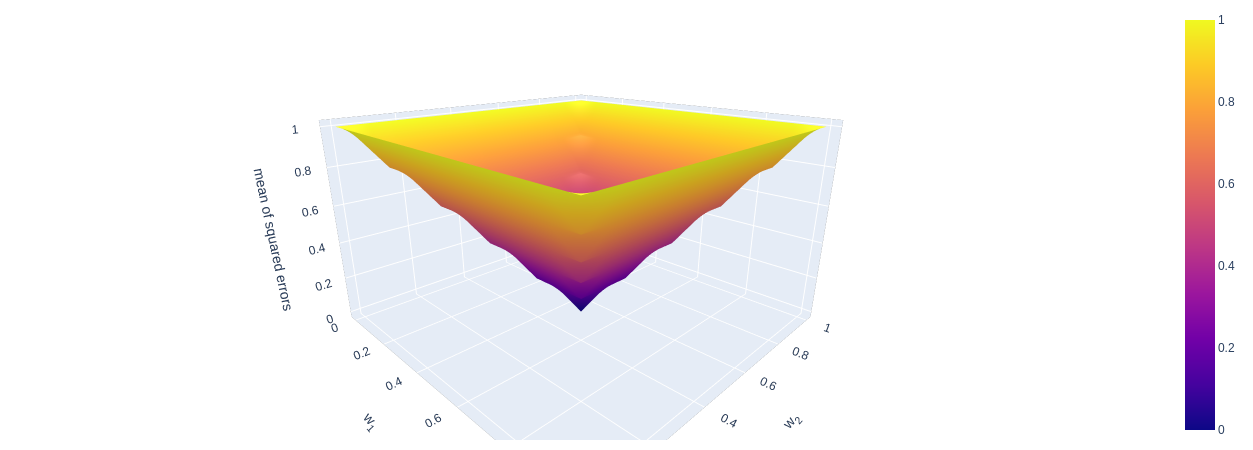

In [4]:
import plotly.graph_objs as go
import numpy as np

x = np.arange(0,1.1,0.1)
y = np.arange(0,1.1,0.1)
z = [
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1,.8,.8,.8,.8,.8,.8,.8,.8,.8, 1],
    [1,.8,.6,.6,.6,.6,.6,.6,.6,.8, 1],
    [1,.8,.6,.4,.4,.4,.4,.4,.6,.8, 1],
    [1,.8,.6,.4,.2,.2,.2,.4,.6,.8, 1],
    [1,.8,.6,.4,.2,.0,.2,.4,.6,.8, 1],
    [1,.8,.6,.4,.2,.2,.2,.4,.6,.8, 1],
    [1,.8,.6,.4,.4,.4,.4,.4,.6,.8, 1],
    [1,.8,.6,.6,.6,.6,.6,.6,.6,.8, 1],
    [1,.8,.8,.8,.8,.8,.8,.8,.8,.8, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
]

fig = go.Figure(go.Surface(x=x, y=y, z=z))

scene = dict(xaxis_title='w<sub>1</sub>',
             yaxis_title='w<sub>2</sub>',
             zaxis_title='mean of squared errors',
             aspectratio= {"x": 1, "y": 1, "z": 0.6},
             camera_eye= {"x": 1, "y": -1, "z": 0.5})

fig.layout.update(scene=scene,
                   width=700,
                   margin=dict(r=20, b=10, l=10, t=10))

fig.show()

**All neural networks can be seen as solving optimization problems**, usually, in high-dimensional spaces, with thousands or millions of weights to be adjusted to find the best solution. [AlexNet](https://en.wikipedia.org/wiki/AlexNet), the model that won the ImageNet Visual Recognition Challenge in 20212, has 60,954,656 adjustable parameters. Nowadays, in 2020, most state-of-the-art neural networks have several orders of magnited more parameters than AlexNet. 

Alas, the bad news is that most problems worth solving in cognitive science are *nonconvex*, meaning that finding the so-called global minima becomes extremely hard, and it most cases can't be garanteed. In the 3D case, instead of having a nice cone-like error surface, we obtain something more similar to a complex landscape of mountains and valleys, like the Cordillera de Los Andes or the Rocky Mountains. **Figure 4** shows an example of such a landscape:

<center> Figure 4 </center>
<br style = “line-height:100px;”>
<img src="images/adaline/sse-nonconvex.svg" width="100%"/>

Now, instead of having a unique point where the error is at its minimun, we have *multiple low points or "valleys" at different sections in the surface*. Those "valleys" are called **[local minima](https://en.wikipedia.org/wiki/Maxima_and_minima)**, or the point of minimun error for that section. Ideally, we always want to find the "global minima", yet, with a landscape like this, finding it may become very hard and slow. If you try this document in interactive mode (mybinder or locally), you can run the code below and play with the interactive 3D surface.

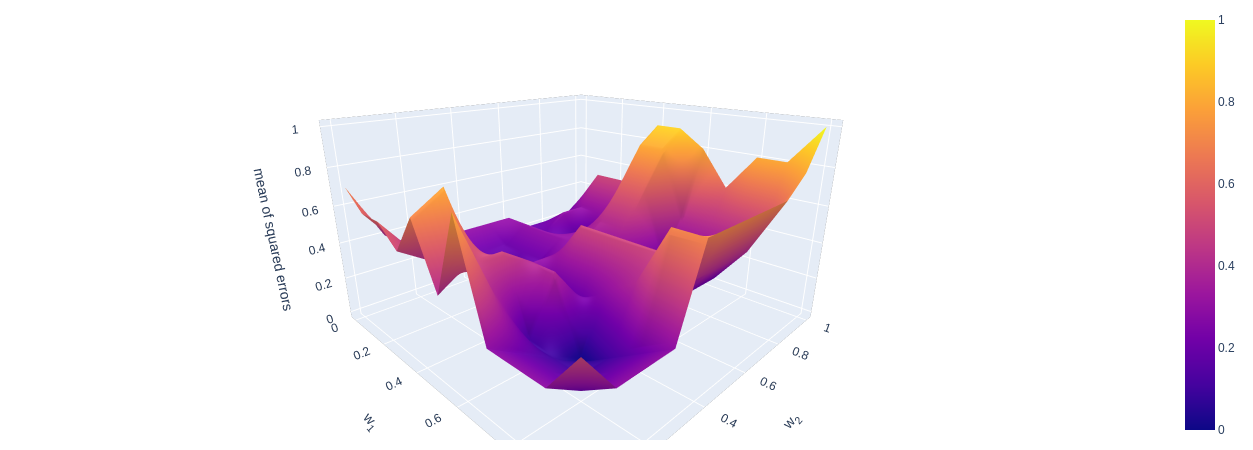

In [5]:
import plotly.graph_objs as go
import numpy as np

x = np.arange(0,1.1,0.1)
y = np.arange(0,1.1,0.1)
z = [
    [.7,.6,.6,.5,.7,.4,.8,.3,.3,.3,.5],
    [.4,.4,.4,.4,.8,.5,.4,.2,.2,.2,.3],
    [.3,.3,.3,.3,.3,.5,.1,.1,.1,.2,.3],
    [.3,.2,.2,.2,.3,.4,.4, 0,.1,.2,.3],
    [.3,.2,.1,.2,.3,.2,.2,.3,.4,.7,.7],
    [.3,.2,.2,.2,.3,.5,.5,.5,.5,.4,.7],
    [.3,.3,.3,.3,.3,.2,.2,.2,.2,.4,.7],
    [.2,.2,.2,.3,.4,.4,.2,.1,.2,.4,.7],
    [.2,.3,.1,.3,.6,.6,.2,.2,.2,.4,.7],
    [.2,.3,.3,.3,.8,.8,.4,.4,.4,.5,.8],
    [.3,.5,.5,.5,.9,.9,.8,.6,.8,.8, 1]
]

fig = go.Figure(go.Surface(x=x, y=y, z=z))

scene = dict(xaxis_title='w<sub>1</sub>',
             yaxis_title='w<sub>2</sub>',
             zaxis_title='mean of squared errors',
             aspectratio= {"x": 1, "y": 1, "z": 0.6},
             camera_eye= {"x": 1, "y": -1, "z": 0.5})

fig.layout.update(scene=scene,
                   width=700,
                   margin=dict(r=20, b=10, l=10, t=10))

fig.show()

### Learning procedure

By now, we know that we want to find a set of parameters that minimize the mean of squared errors. The ADALINE approaches this by utilizing the so-called **gradient descent algorithm**. For convex problems (cone-like error surface), gradient descent is garanteed to find the global minima. For nonconvex problems, gradient descent is only garanteed to find a local minima, that may or may not be the global minima as well. At this point we will only discuss convex optimization problems. 

Imagine that you are hiker at the top of a mountain in the side of a valley. Similar to **Figure 5**. Your goal is to reach the base of the valley. Logically, you would want to walk downhill over the hillside until you reach the base. In the context of training neural networks, this is what we call "descending a gradient". Now, it would be nice if you could do this *efficiently*, meaning to follow the path that will get you faster to the base of the valley. In gradient descent terms, this equals to move along the error surface in the direction where the gradient (degree of inclination) is steepest. As a hiker, you can visually inspect your surroundings to determine the best path. In a optimization context, we can use the [chain-rule of calculus](https://en.wikipedia.org/wiki/Chain_rule) to estimate the gradient and adjust the weights.

<center> Figure 5 </center>
<br style = “line-height:100px;”>
<img src="images/adaline/gradient-hiker.svg" width="60%"/>

For conciseness, let's define the error of the network as function $E$.  

$$
E(\hat{y}) = \frac{1} n\sum_{j=1}^{n}(y_j - \hat{y_j})^2
$$

If we expand $\hat{y_j}$, whe obtain:

$$
E(w,x) = \frac{1} n\sum_{j=1}^{n}(y_j - (b+\sum_{i}w_ix_i)_j)^2
$$

Now, remember that the only values we can adjust to change $\hat{y}$ are the weights, $w_i$. In differential calculus, taking derivatives means to calculate the *rate of change of a function with respect to an infinitely small change in a input argument*. If "infinitely small" sounds like nonsense to you, for practical puposes, think about it as a very small change, let's say, 0.000001. In our case, it means to compute the rate of change of the $E$ function in response to very small change in $w$. That is what we call to compute a gradient, that we will call $\Delta$, at a point in the error surface. 

Widrow and Hoff has the idea that insted of computing the gradient for the total mean squared error $E$, they could approximate the gradient's value by computing the partial derivative of the error with respect to the weights on each iteration. Since we are dealing with a single case, let's drop the summation symbols and indices for clarity. The function to derivate becomes:    

$$\begin{eqnarray} 
e(w,x) =(y-(b+wx))^2 \nonumber \\
e(w,x) =(y-b-wx)^2  \nonumber
\end{eqnarray}
$$

Now comes the fun part. By applying the chain-rule of calculus, $e$:

$$
\hat{\Delta} = \frac{\partial e}{\partial w} = 2(y-b-wx) 
$$

This expression is equivalent to:

$$
\hat{\Delta} = \frac{\partial e}{\partial w} = 2(y-\hat{y}) 
$$


This may come as a surprise for you, but the gradient in this case is as simple as **2 times the difference between the expected and predicted value**. Now we know the $\hat{\Delta}$ we need to update the weights at each iteration. Finally, the rule to update the weights says the following: "**change the weight, $w_j$, by a portion, $\eta$, of the calculated negative gradient, $\Delta_j$**". We use the negative of the gradient because we want to go "downhill", otherwise, you will be climbing the surface in the wrong direction. Formally, this is:

$$w_{j+1} = w_j + \eta(- \Delta_j)$$

We use a portion ($\eta$) of the gradient instead of the full value to avoid "bouncing around" the minima of the function. This is easier to understand by looking at a simplified example as in **Fugure 6**

<center> Figure 6 </center>
<br style = “line-height:100px;”>
<img src="images/adaline/step-size.svg" width="60%"/>

In the left pane, the value of $\eta$ is to large to allow the gradient ball to reach the minima of the function so the ball bounces around the minima withouth touching it. In the right pane, the value of $\eta$ is small enough to allow the ball to reach the minima after a few iterations. The issue of adjusting the step-size or learning rate to find a minima is usually solved by semi-automatically searching over different values of $\eta$ when training networks. "Why don't use very small values of $\eta$ all the time?" Because there is a trade-off on training time. Smaller values of $\eta$ may help to find the minima, but it will also extend the training time as usually more steps are needed to find the solution.

## Adaline algorithm implementation

We will implement the Adaline algorithm from scrath with Python and Numpy (a Python package for scientific computing). The goal is to understand the perceptron step-by-step execution rather than achieving an elegant implementation. I'll break down each step into functions to ensemble everything at the end. 


### Generate vector of random weights

In [1]:
import numpy as np

def random_weights(X, random_state: int):
    '''create vector of random weights
    Parameters
    ----------
    X: 2-dimensional array, shape = [n_samples, n_features]
    Returns
    -------
    w: array, shape = [w_bias + n_features]'''
    rand = np.random.RandomState(random_state)
    w = rand.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
    return w

Predictions from Adaline are obtained by a linear combination of features and weights. It is common practice to begin with a vector of small random weights that would be updated later by the Adaline learning rule.

### Compute net input

In [2]:
def net_input(X, w):
    '''Compute net input as dot product'''
    return np.dot(X, w[1:]) + w[0]

Here we pass the featue matrix and the previously generated vector of random weights to compute the inner product. Remember that we need to add an extra weight for the bias term at the begining of the vector (`w[0`)

### Compute activation

In [3]:
def activation(X):
    '''Compute linear activation'''
    return X

Note that the activation function returns the same values passed in. As we mentioned earlier, the linear activation function of Adaline, is the **identity function**, which means exactly this: units will be activated in direct proportion to the output of the linear combination of vectors and weights. Technically, we might not use this function and the result will be the same. Yet, we add this for conceptual completeness. 

### Compute predictions

In [4]:
def predict(X, w):
    '''Return class label after unit step'''
    return np.where(net_input(X, w) >= 0.0, 1, -1)

Remember that although Adaline learning rule works by comparing the output of a linear function against the class labels, when doing predictions, we still need to pass the output by a *sgn function* to get class labels as in the perceptron.

### Training loop - Learning rule

In [5]:
def fit(X, y, eta=0.001, n_iter=100):
    '''loop over exemplars and update weights'''
    costs = []
    w = random_weights(X, random_state=1)
    for i in range(n_iter):
        net_input_v = net_input(X, w)
        output = activation(net_input_v) # identity function
        errors = (y - output) # compute errors for the entire dataset
        w[1:] += eta * X.T @ errors # update weigths for the entire dataset (feature weights)
        w[0] += eta * errors.sum() # update weigths for the entire dataset (bias-term weights)
        cost = (errors**2).sum() / 2.0 
        costs.append(cost)
 
    return w, costs

Let's examine the fit method that implements the Adaline learning rule:

* Create a vector of random weights by using the `random_weights` function with dimensionality equal to the number of columns in the feature matrix
* Loop over the entire dataset `n_iter` times with `for i in range(n_iter)`
* Compute the inner product between the feature matrix $X$ and the weight vector $w$ by using the `net_input(X, w)` function
* Compute the difference between the predicted values and the target values for the entire dataset `(y - output)`
* Update the weights in proportion to the learning rate $\eta$ by `w[1:] += eta * X.T @ errors` and `w[0] += eta * errors.sum()`
* Compute the SSE `cost = (errors**2).sum() / 2.0 `
* Save the SSE for each iteration `costs.append(cost)`

## Testing the Adaline

We will test the Adaline implementation on the same test that in our previous perceptron: **classifying figures by their shape**. We'll create two type of figures: **tall-figures** and **wide-figures**. As the name suggest, the tall-figures are figures that are taller than wider, and the wider-figures are figures that are wider than taller. 

To accomplish this, we'll sample tall and wide figures at random from a normal distribution by using the following function:

In [6]:
# Define function to create figures type
def figure_type(mu1, sigma1, mu2, sigma2, n_samples, target, seed):
    '''creates [n_sampes, 2] array
    
    Parameters
    ----------
    mu1, sigma1: int, shape = [n_samples, 2]
        mean feature-1, standar-dev feature-1
    mu2, sigma2: int, shape = [n_samples, 2]
        mean feature-2, standar-dev feature-2
    n_samples: int, shape= [n_samples, 1]
        number of sample cases
    target: int, shape = [1]
        target value
    seed: int
        random seed for reproducibility
    
    Return
    ------
    X: ndim-array, shape = [n_samples, 2]
        matrix of feature vectors
    y: 1d-vector, shape = [n_samples, 1]
        target vector
    ------
    X'''
    rand = np.random.RandomState(seed)
    f1 = rand.normal(mu1, sigma1, n_samples)
    f2 = rand.normal(mu2, sigma2, n_samples)
    X = np.array([f1, f2])
    X = X.transpose()
    y = np.full((n_samples), target)
    return X, y

In [7]:
# create tall-figures matrix
T, y_t = figure_type(10, 2, 5, 1, 100, 1, 1)
nl = '\n'
print(f'Feature matrix shape: {T.shape} {nl}target vector shape: {y_t.shape}')
print(f'Feature matrix: {nl}{T[0:4, :]} {nl}target vector: {nl}{y_t[0:4]}')

Feature matrix shape: (100, 2) 
target vector shape: (100,)
Feature matrix: 
[[13.24869073  4.55287144]
 [ 8.77648717  6.2245077 ]
 [ 8.9436565   5.40349164]
 [ 7.85406276  5.59357852]] 
target vector: 
[1 1 1 1]


In [8]:
# create wide-figures matrix
W, y_w = figure_type(5, 1, 10, 2, 100, -1, 2)
nl = '\n'
print(f'Feature matrix shape: {W.shape} {nl}target vector shape: {y_w.shape}')
print(f'Feature matrix: {nl}{W[0:4, :]} {nl}target vector: {nl}{y_w[0:4]}')

Feature matrix shape: (100, 2) 
target vector shape: (100,)
Feature matrix: 
[[ 4.58324215 12.32304298]
 [ 4.94373317 10.7721561 ]
 [ 2.8638039   7.73373345]
 [ 6.64027081 10.86618511]] 
target vector: 
[-1 -1 -1 -1]


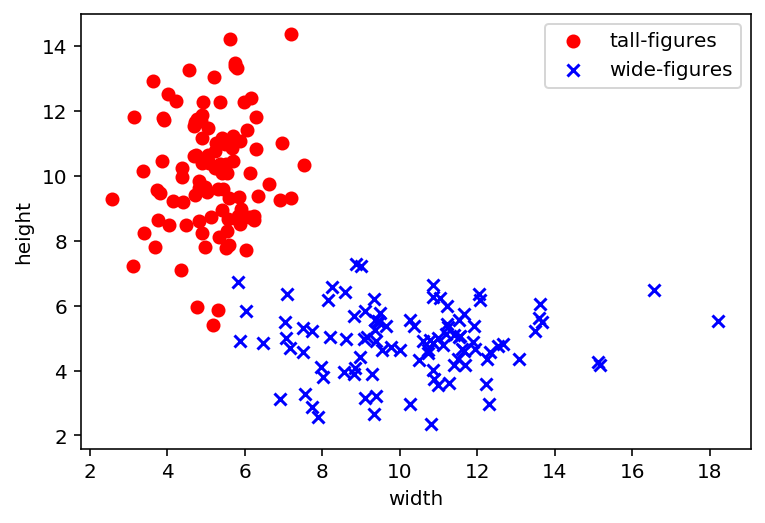

In [9]:
import matplotlib.pyplot as plt
plt.scatter(T[:, 1], T[:, 0], color='red', marker='o', label='tall-figures')
plt.scatter(W[:, 1], W[:, 0], color='blue', marker='x', label='wide-figures')
plt.xlabel('width')
plt.ylabel('height')
plt.legend(loc='upper right')
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

X = np.concatenate((T, W), axis=0)
y = np.concatenate((y_t, y_w), axis=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    random_state=1,
                                                    shuffle=True)

In [11]:
print(f'X_train.shape: {X_train.shape}')
print(f'y_train.shape: {y_train.shape}')
print(f'X_test.shape: {X_test.shape}')
print(f'y_test.shape: {y_test.shape}')

X_train.shape: (140, 2)
y_train.shape: (140,)
X_test.shape: (60, 2)
y_test.shape: (60,)


This function takes the training set, training targets, learning rate, and number of iterations. Recall that the Adaline update the weights **after** doing a full pass for the entire training set, whereas the peceptron does it after each individual training exemplar. Therefore, we will pass the entire training set 1 time (`n_iter=1`)

In [12]:
# fit and predict values
def training_values(X_train, y_train, eta=0.001, n_iter=1):
    w, cost = fit(X_train, y_train, eta=eta, n_iter=n_iter)
    y_pred = predict(X_test, w)
    return w, cost, y_pred

w, cost, y_pred = training_values(X_train, y_train)

nl = '\n'
print(f'vector of weights: {w}{nl}')
print(f'cost at each time step: {cost}{nl}')
print(f'predicted value for each case: {y_pred}{nl}')

vector of weights: [ 0.02614765  0.42163998 -0.2764838 ]

cost at each time step: [70.66186787674164]

predicted value for each case: [ 1  1  1 -1 -1 -1  1  1  1 -1  1  1  1  1 -1 -1 -1  1  1  1  1  1  1  1
  1 -1  1  1  1  1  1 -1 -1 -1 -1  1 -1  1  1 -1 -1 -1 -1  1  1  1 -1  1
 -1 -1  1 -1  1  1  1 -1 -1 -1 -1 -1]



In [13]:
def acc(y_pred, y_test):
    num_correct_predictions = (y_pred == y_test).sum()
    accuracy = (num_correct_predictions / y_test.shape[0]) * 100
    return (accuracy)
    
accuracy = acc(y_pred, y_test)
print('Test set accuracy: %.2f%%' % accuracy)

Test set accuracy: 93.33%


We obtain a SSE (cost) equal to **70.7** with a **93.33%** of classification accuracy. Pretty good. Let's try now by passing training set **twice times** by the training loop.

In [14]:
# fit and predict values
w, cost, y_pred = training_values(X_train, y_train, n_iter=2)

nl = '\n'
print(f'vector of weights: {w}{nl}')
print(f'cost at each time step: {cost}{nl}')
print(f'predicted value for each case: {y_pred}{nl}')

vector of weights: [-0.12486643 -1.09800089 -1.08582971]

cost at each time step: [70.66186787674164, 158.3678895769619]

predicted value for each case: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]



In [15]:
accuracy = acc(y_pred, y_test)
print('Test set accuracy: %.2f%%' % accuracy)

Test set accuracy: 50.00%


Something really odd happened: the **SSE went up from 70 to 158.4**, and the **accuracy drop from 93.33% to 50%**. All the test cases has been classified as -1. Maybe we need more training, let's try with 5 loops.

In [16]:
# fit and predict values
w, cost, y_pred = training_values(X_train, y_train, n_iter=5)

nl = '\n'
print(f'vector of weights: {w}{nl}')
print(f'cost at each time step: {cost}{nl}')
print(f'predicted value for each case: {y_pred}{nl}')

accuracy = acc(y_pred, y_test)
print('Test set accuracy: %.2f%%' % accuracy)

vector of weights: [ 553.09756457 4250.98926834 4373.14848469]

cost at each time step: [70.66186787674164, 158.3678895769619, 20245.308891118286, 5041394.106643895, 1260698508.9443188]

predicted value for each case: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

Test set accuracy: 50.00%


## The exploding gradient problem

Nothing improved, on the contrary, the SSE is getting bigger with each iteration over the training set. The key to this problem is on the **vector of weights**. Remember that the weights are updated in relation to the **mistmatch between the net ouput of the linear activation function and the class labels**. This means that unless the error is exactly zero, **the weights will continue to grow (or decrease) without limit** after each pass of the training set. As the weights grow,the net output will continue to grow as well, making the error on each iteration bigger. This loop continues **until the weights "explode"** and the network is unable to learn anything meaningful anymore. This is know as the "exploding" gradient problem, which is one of the main limitations on the use of this kind of training algorithms in the context of neural networks.

## The Linear Separability Constrain

In [17]:
#### TODO ####

## References

- Talbert, L. R., Groner, G. F., & Koford, J. S. (1963). Real-Time Adaptive Speech-Recognition System. The Journal of the Acoustical Society of America, 35(5), 807–807.


- Widrow, B., & Hoff, M. E. (1960). Adaptive switching circuits (No. TR-1553-1). Stanford Univ Ca Stanford Electronics Labs.

- Widrow, B., & Lehr, M. A. (1990). 30 years of adaptive neural networks: perceptron, madaline, and backpropagation. Proceedings of the IEEE, 78(9), 1415-1442.

- Widrow, B., & Lehr, M. A. (1995). Perceptrons, Adalines, and backpropagation. The handbook of brain theory and neural networks, 719-724.

**For code implementation:** 

- Raschka, S. (2015). Python machine learning. Packt Publishing Ltd.